In [8]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('heart.csv')
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
x =df.drop('target', axis =1)
y= df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=25)
x_train.shape

(242, 13)

In [16]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)



Confusion Matrix:
 [[110   0]
 [  0 132]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [18]:
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[21  7]
 [ 9 24]]
Accuracy : 0.7377049180327869
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



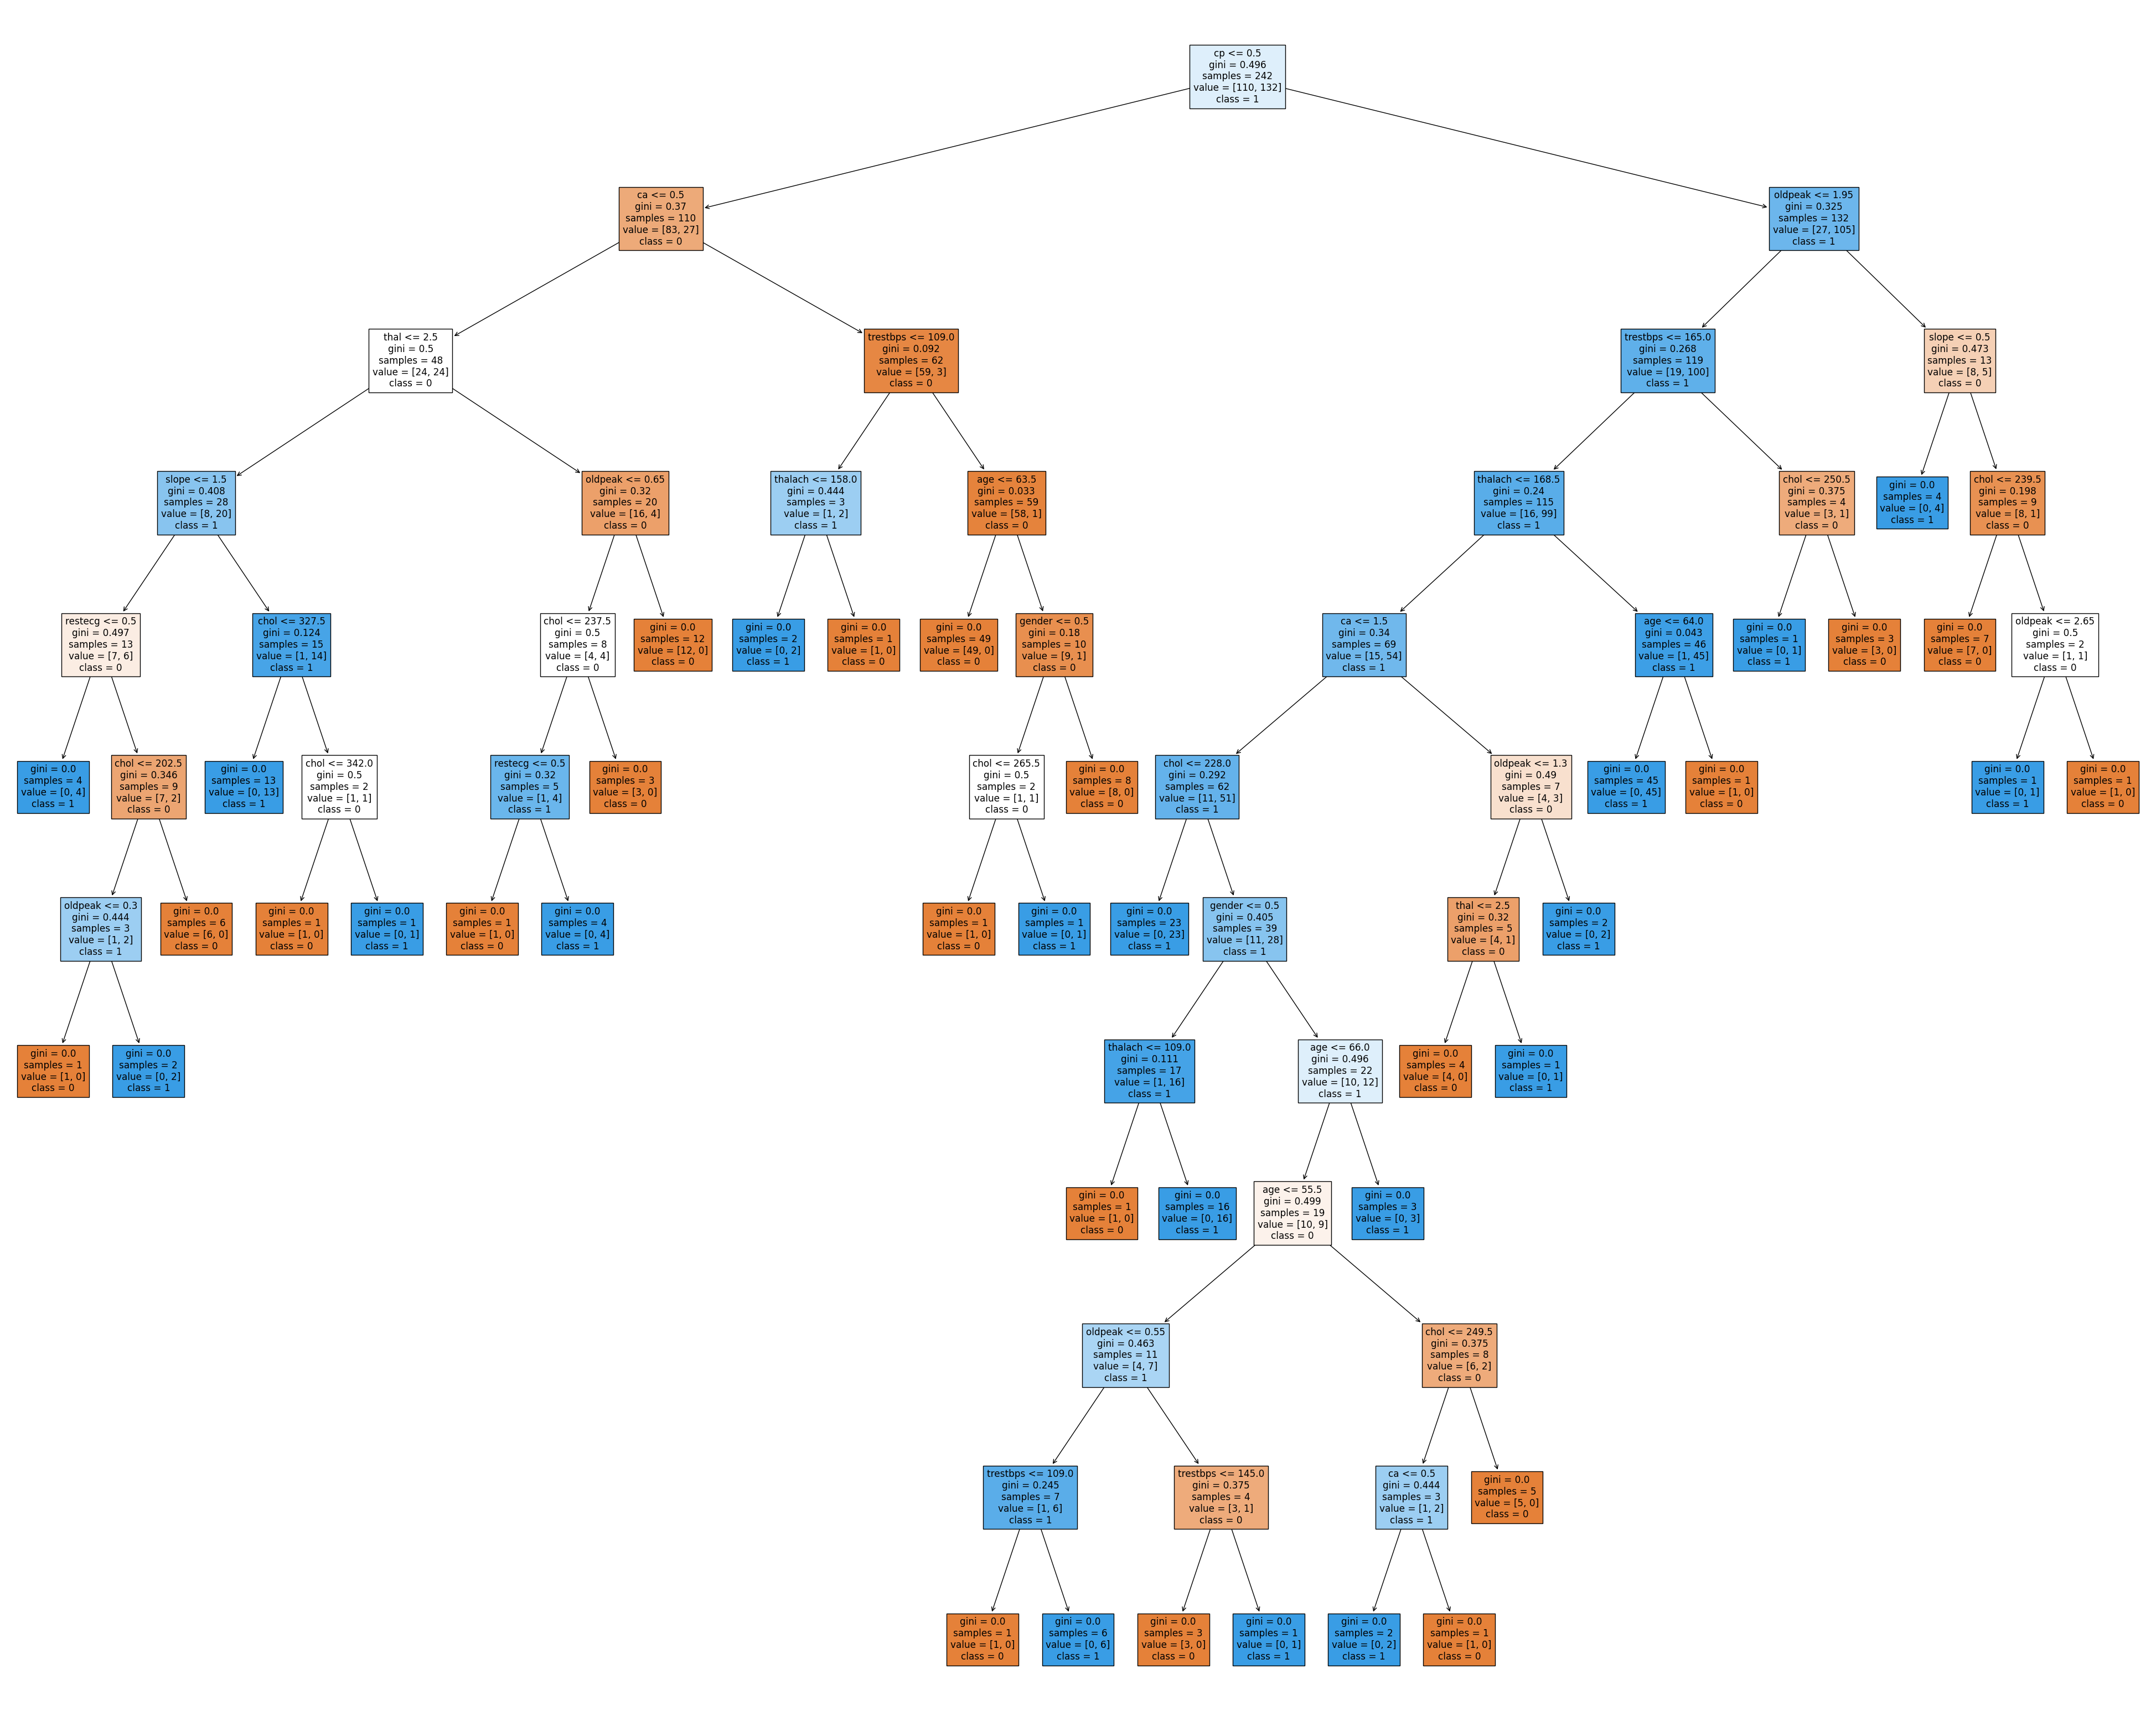

In [21]:
plt.figure(figsize = (50,40))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_without_hyp.png')

In [22]:
df_clf.feature_importances_

array([0.07673364, 0.02502857, 0.3025    , 0.06809844, 0.1275376 ,
       0.        , 0.03625356, 0.04440608, 0.        , 0.07580415,
       0.07063696, 0.12157244, 0.05142857])

<Axes: >

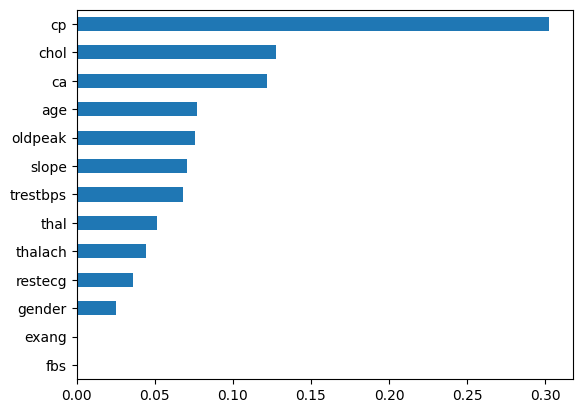

In [24]:
s1 = pd.Series(df_clf.feature_importances_ , index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [25]:
### HYPERPARAMETER TUNNING 

In [33]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(3,8),
            "min_samples_split" : range(6,20),
            "min_samples_leaf" : range(3,15),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = GridSearchCV(dt_clf, hyp_grid, verbose=1, cv = 5, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 8),
                         'min_samples_leaf': range(3, 15),
                         'min_samples_split': range(6, 20)},
             verbose=1)

In [34]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=6)

In [35]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[ 83  27]
 [ 12 120]]
Accuracy : 0.8388429752066116
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       110
           1       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.83       242
weighted avg       0.84      0.84      0.84       242



In [36]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[22  6]
 [ 4 29]]
Accuracy : 0.8360655737704918
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



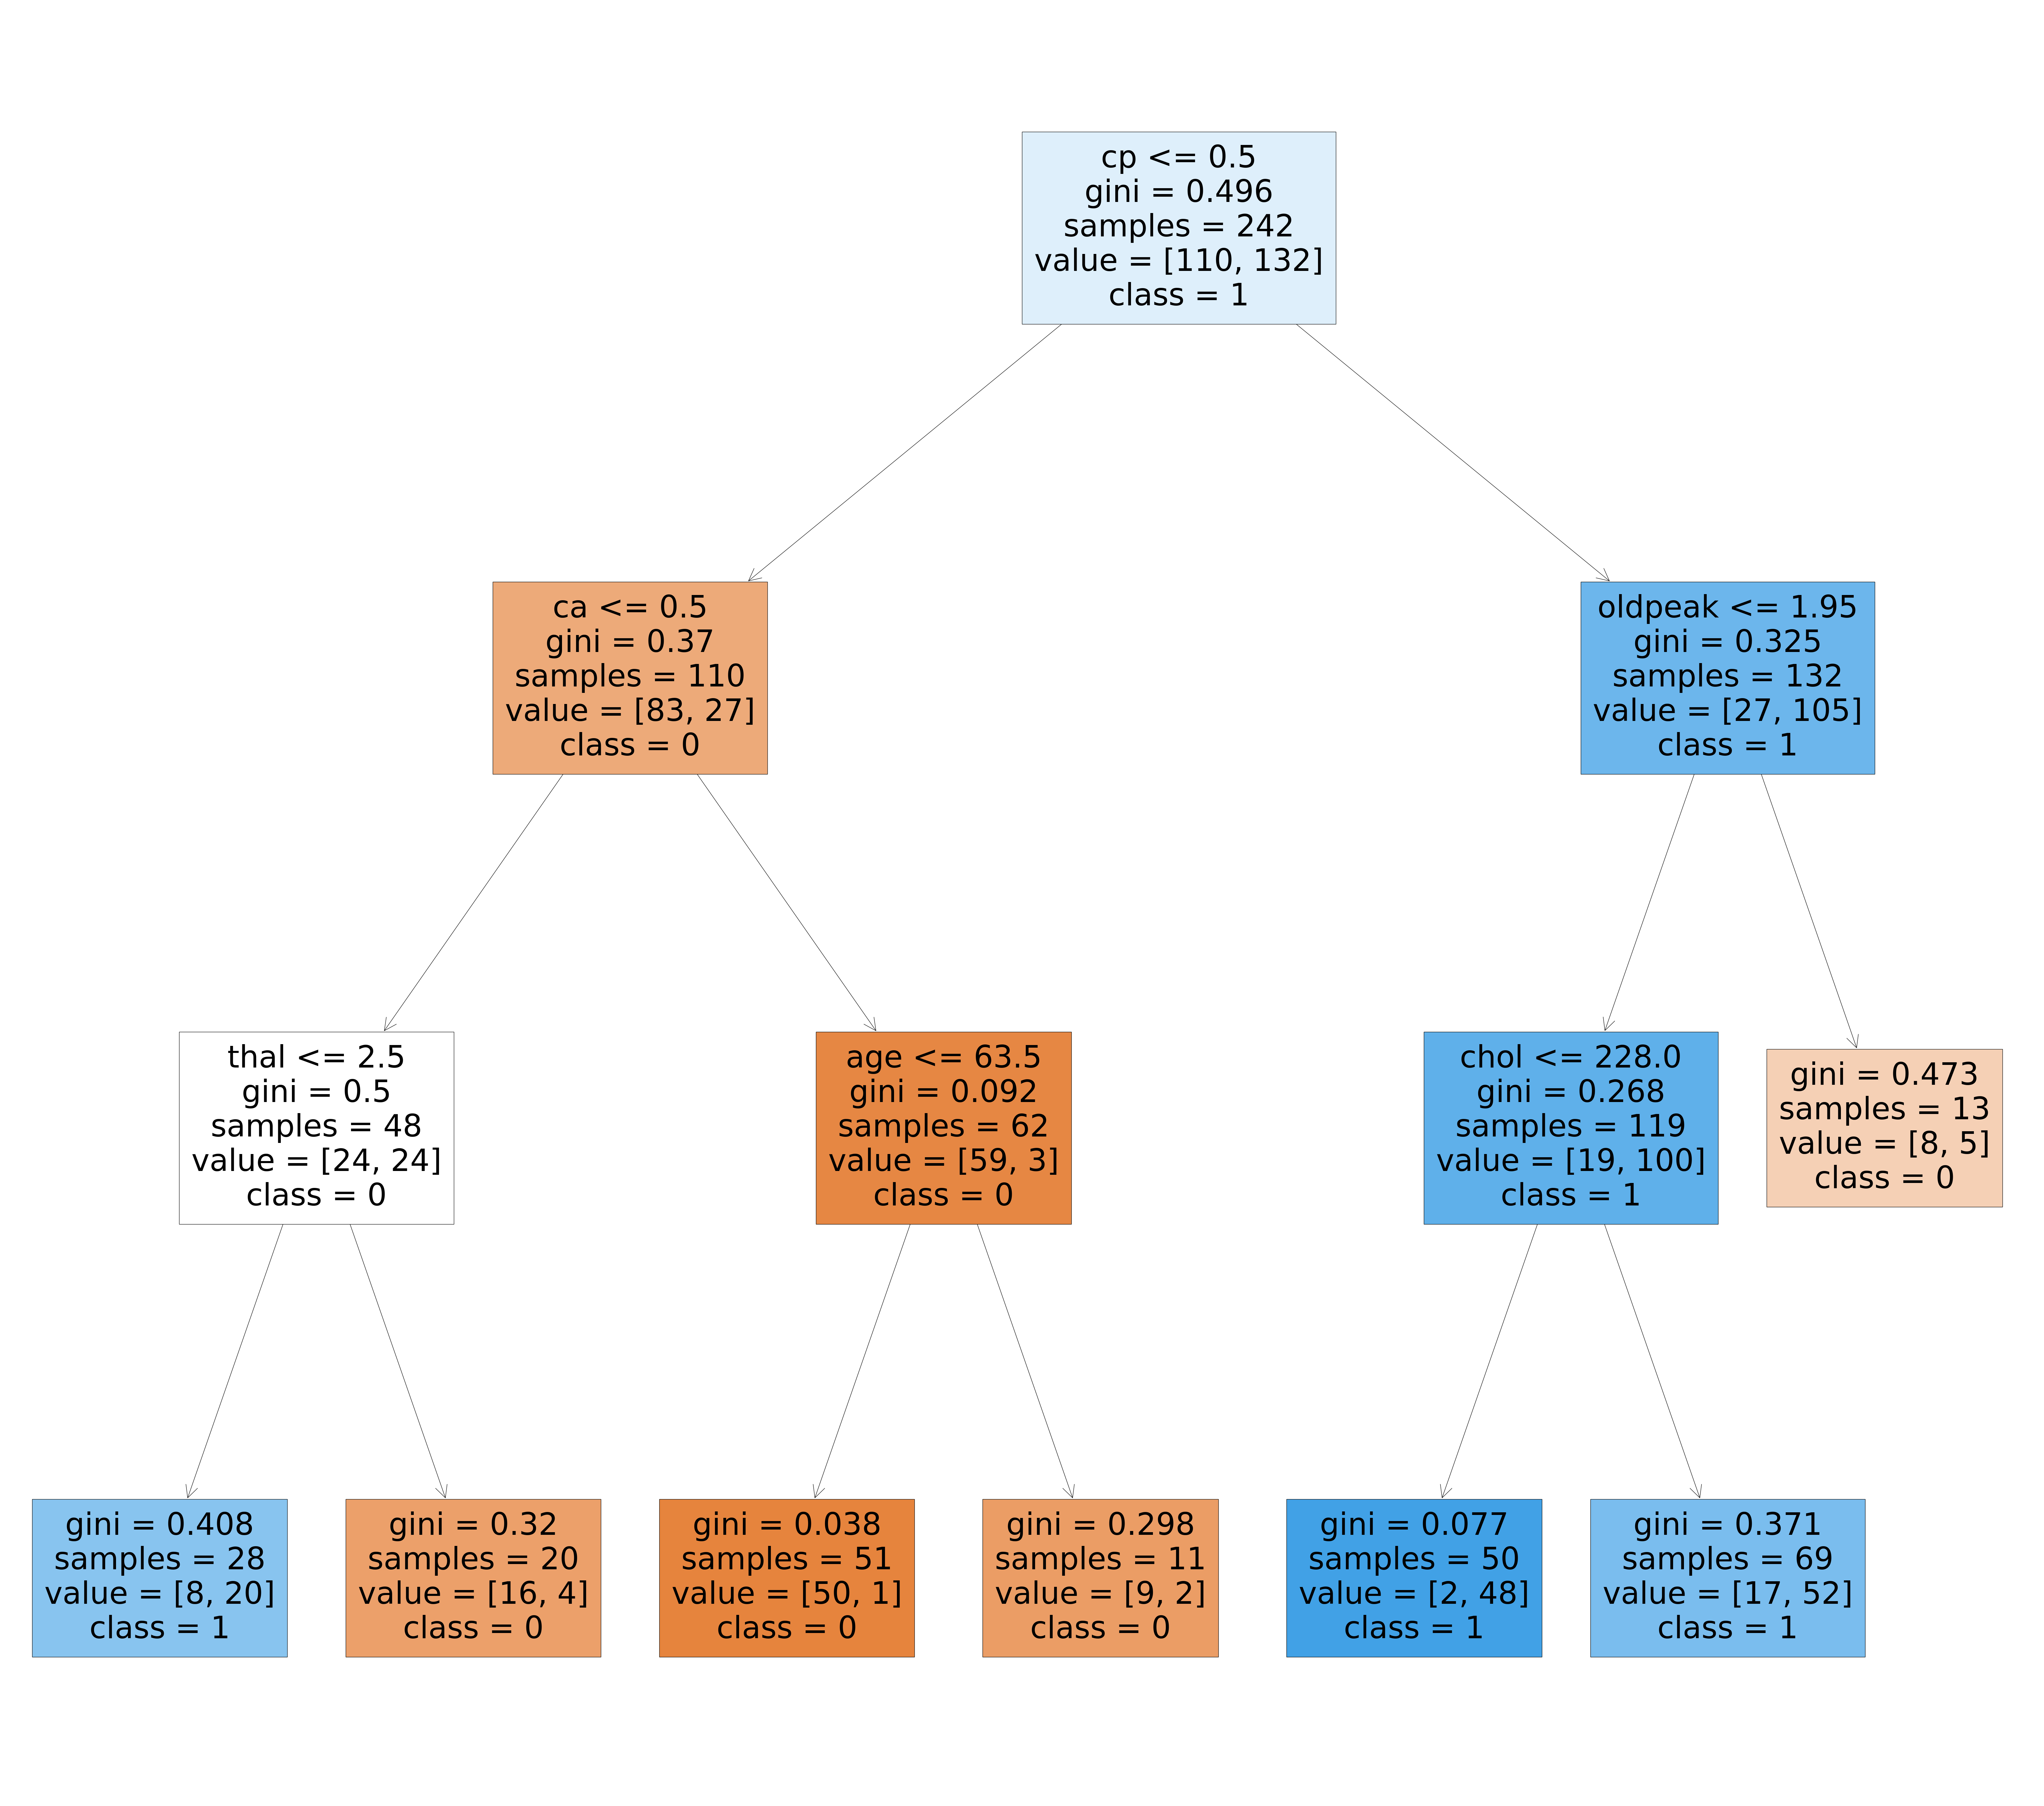

In [37]:
plt.figure(figsize = (90,80))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_with_hyp.png')

<Axes: >

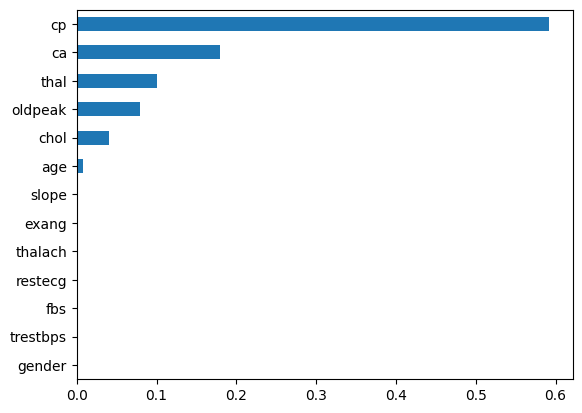

In [38]:
s1 = pd.Series(dt_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [39]:
### RANDOMISED SEARCH CV

In [40]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(3,8),
            "min_samples_split" : range(6,20),
            "min_samples_leaf" : range(3,15),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = RandomizedSearchCV(dt_clf, hyp_grid, verbose=1, cv = 5, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 8),
                                        'min_samples_leaf': range(3, 15),
                                        'min_samples_split': range(6, 20)},
                   verbose=1)

In [41]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=17)

In [42]:
# Training Data Evaluation
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[ 88  22]
 [ 17 115]]
Accuracy : 0.8388429752066116
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.84      0.87      0.86       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [43]:
# Testing  Data Evaluation
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[23  5]
 [ 7 26]]
Accuracy : 0.8032786885245902
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



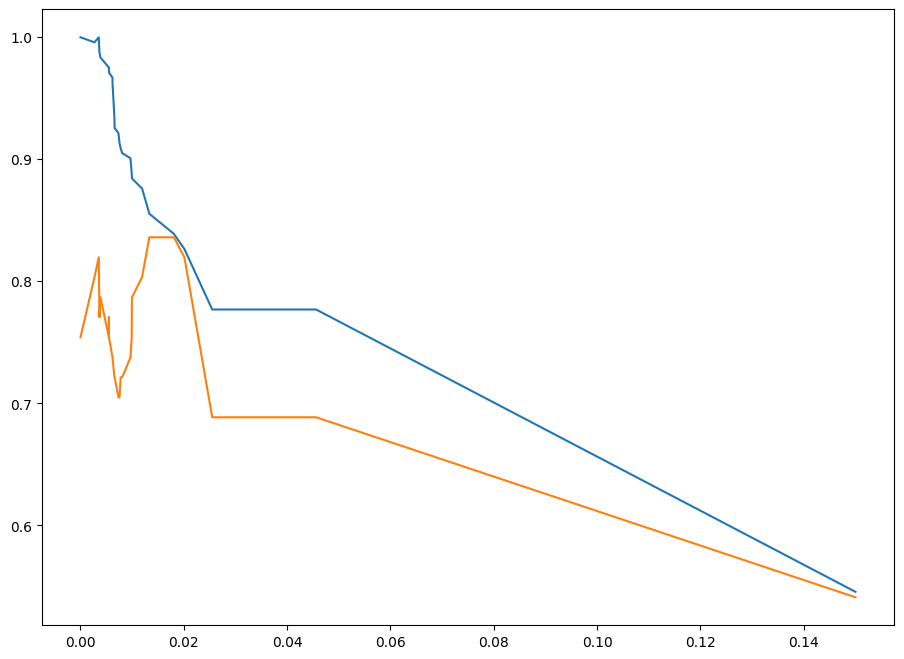

In [45]:
dt_clf = DecisionTreeClassifier()
# dt_clf.fit(x_train, y_train)
ccp_alpha_values = dt_clf.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']
# print(ccp_alpha_values)

train_data_accuracy = []
test_data_accuracy = []

for i in ccp_alpha_values:
    dt_clf = DecisionTreeClassifier(ccp_alpha=i)
    dt_clf.fit(x_train, y_train)
    train_data_accuracy.append(dt_clf.score(x_train, y_train))
    test_data_accuracy.append(dt_clf.score(x_test, y_test))

plt.figure(figsize=(11,8))
plt.plot(ccp_alpha_values, train_data_accuracy)
plt.plot(ccp_alpha_values, test_data_accuracy)

In [46]:
np.argmax(test_data_accuracy)

21

In [48]:
test_data_accuracy[21]

0.8360655737704918

In [49]:
train_data_accuracy[21]

0.8553719008264463